In [1]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Set a visual style for the plots
sns.set_style("whitegrid")

In [3]:
# =============================================================================
# # 2. DATA LOADING AND PREPARATION
# =============================================================================
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please download it from Kaggle and check the filename.")
    exit()

print("--- First 5 Rows of the Dataset ---")
print(df.head())

# For this analysis, we will focus on 'Annual Income' and 'Spending Score'.
# Let's select these two columns for our clustering model.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("--- Data selected for clustering ---")
print(X.head())

--- First 5 Rows of the Dataset ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
--- Data selected for clustering ---
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


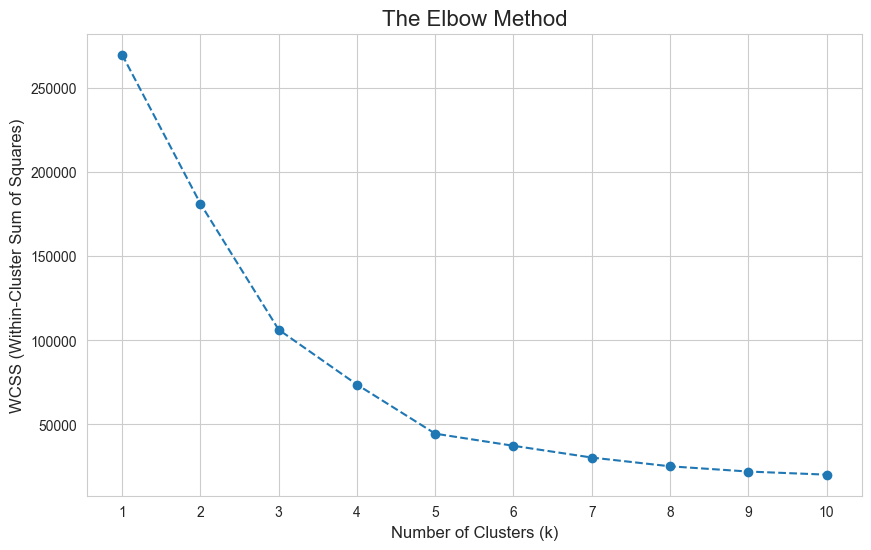

--- Optimal k identified as 5 ---




In [4]:
# =============================================================================
# # 3. FINDING THE OPTIMAL NUMBER OF CLUSTERS (THE ELBOW METHOD)
# =============================================================================
# The Elbow Method helps us find the best value for 'k' (the number of clusters).
# We run K-Means for a range of k values and plot the WCSS (Within-Cluster Sum of Squares).

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.savefig('elbow_method.png')
plt.show()

# Insight: The "elbow" or the point of inflection on the curve is at k=5.
# This suggests that 5 is the optimal number of clusters for our data.
print("--- Optimal k identified as 5 ---")

In [6]:
# =============================================================================
# # 4. TRAINING THE K-MEANS MODEL WITH k=5
# =============================================================================
# Now we train our final model using the optimal number of clusters.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# Add the cluster information back to our original DataFrame
df['Cluster'] = y_kmeans

print("--- First 5 Rows with Cluster Information ---")
print(df.head())

--- First 5 Rows with Cluster Information ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


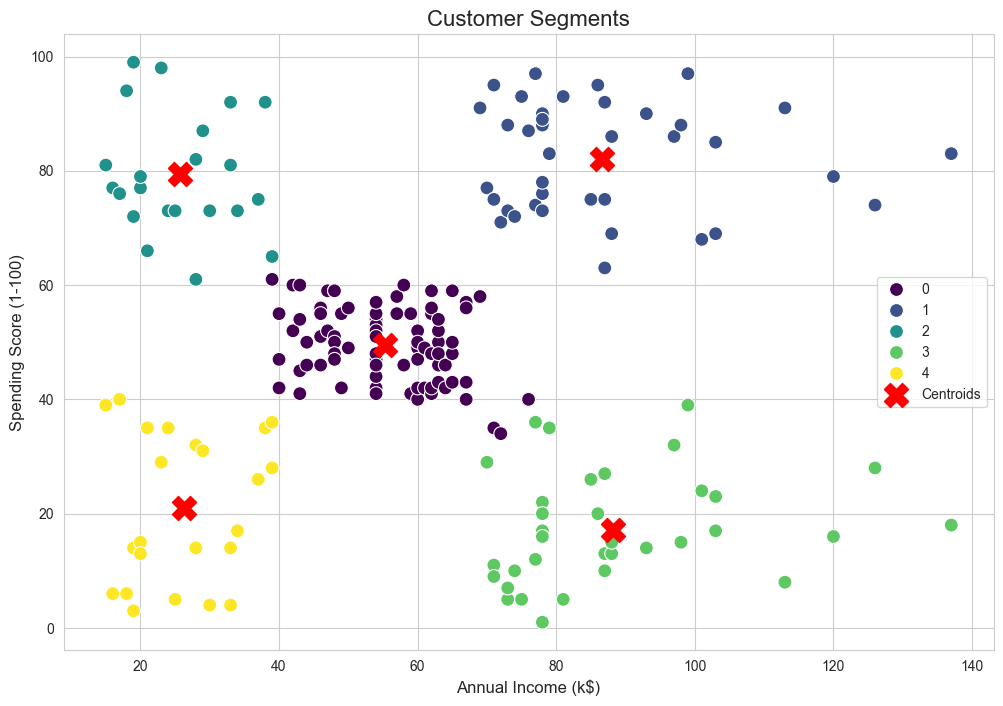

In [7]:
# =============================================================================
# # 5. VISUALIZING THE CUSTOMER SEGMENTS
# =============================================================================
# This is the most important visual, showing the final segmented groups.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.savefig('customer_segments.png') # Save this plot for LinkedIn
plt.show()